<a href="https://colab.research.google.com/github/claudio1975/Medium-blog/blob/master/Sentiment_Analysis_on_Extreme_Events/Turkey_Tweets_Earthquakes_Sentiment_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis performed on Turkey Earthquake Tweets

Usually, sentiment analysis is used in Marketing to better consider customer needs, to monitor risk insight on what people are thinking about a
particular product, and to extract information about expected
trends in order to improve marketing strategy. Also in Marketing Insurance sentiment analysis is used, but not only, it is useful in risk assessment, by modelling the sentiment from tweets there is the opportunity to build a risk factor that can be used in the premium risk modelling.
The following job gives an example of sentiment analysis applied to the Turkey Earthquake Tweets with the use of the TextBlob benchmark tool compared with pre-trained sentiment analysis models from Hugging Face Hub.

References:

https://www.kaggle.com/datasets/gpreda/turkey-earthquake-tweets

https://huggingface.co/blog/sentiment-analysis-python




### Upload Libraries

In [1]:
! pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 48.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 47.7 MB/s eta 0:00:00


In [2]:
! pip install emoji==0.6.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-0.6.0-py3-none-any.whl size=49721 sha256=aee32367b3ff954d4037a08ab1432e11c0c5e5b6714a159a58e7c266c0006b27
  Stored in directory: /root/.cache/pip/wheels/1b/bd/d9/310c33c45a553798a714e27e3b8395d37128425442b8c78e07
Successfully built emoji


In [3]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 13.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993224 sha256=dd9f8c3e7ee0edd050104038a915e0af464f4ded17f65c76e0004d53e2382c8c
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


### Prepare Workspace

In [4]:
import pandas as pd
import numpy as np
import textblob
from textblob import TextBlob
from transformers import pipeline
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import time
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import langdetect
import seaborn as sns

### Upload Data

In [5]:
from google.colab import files
uploaded = files.upload()

Saving turkey_earthquake_tweets.csv to turkey_earthquake_tweets.csv


In [6]:
df = pd.read_csv('turkey_earthquake_tweets.csv',
                index_col=0,
                parse_dates=True)

### Look at the dataset

In [7]:
print(df.shape)

(28844, 15)


In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 28844 entries, 1624185742552403969 to 1629133507615137794
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_name         28841 non-null  object 
 1   user_location     20767 non-null  object 
 2   user_description  26247 non-null  object 
 3   user_created      28844 non-null  object 
 4   user_followers    28844 non-null  object 
 5   user_friends      28843 non-null  float64
 6   user_favourites   28843 non-null  float64
 7   user_verified     28843 non-null  object 
 8   date              28843 non-null  object 
 9   text              28843 non-null  object 
 10  hashtags          17866 non-null  object 
 11  source            28842 non-null  object 
 12  retweets          28842 non-null  float64
 13  favorites         28842 non-null  float64
 14  is_retweet        28842 non-null  object 
dtypes: float64(4), object(11)
memory usage: 3.5+ MB
None


In [9]:
print(df.columns)

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')


In [10]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
id,,,,,,,,,,,,,,,
1624185742552403969,Gogoman,NaN,NaN,2012-12-26 12:08:27+00:00,369,2076.0,99630.0,False,2023-02-10 23:17:11+00:00,@simonkjaer1989 @acmilan @acmilanbr @acmilanar...,NaN,Twitter for Android,0.0,0.0,False
1624155272179580928,Crypto Dough Doe,"London, England",Get rich our die buying! $link,2019-11-13 23:30:36+00:00,1002,447.0,3798.0,False,2023-02-10 21:16:06+00:00,Hi People...any help here would be much apprec...,NaN,Twitter Web App,0.0,0.0,False
1624144833647415325,Eylem KILIÇ,NaN,⚕,2020-07-21 16:12:08+00:00,85,143.0,2737.0,False,2023-02-10 20:34:38+00:00,@JLo @intimissimi #TurkeyQuake we are in desp...,"['TurkeyQuake', 'AhbapDernegi', 'hatay', 'AFAD']",Twitter for Android,0.0,0.0,False
1624123056372187143,bee | tarlos 🎗,NaN,NaN,2018-03-24 12:03:03+00:00,0,6.0,68704.0,False,2023-02-10 19:08:06+00:00,thank you rafael this means a lot 😭😭😭💜 #Turkey...,"['TurkeyQuake', 'türkiye', 'deprem']",Twitter for iPhone,0.0,0.0,False
1624121846479061019,Ameya,India,Life lead by curiousity & mind filled with que...,2017-10-26 16:20:28+00:00,29,146.0,106.0,False,2023-02-10 19:03:17+00:00,@adgpi Hey @BBCWorld try to cover these storie...,['TurkeyQuake'],Twitter for iPhone,0.0,0.0,False


In [11]:
df_ = df.copy()

In [12]:
def detect_lang(text):
    try:
        return langdetect.detect(text)
    except:
        return "unknown"

df_['lang'] = df_["text"].apply(detect_lang)

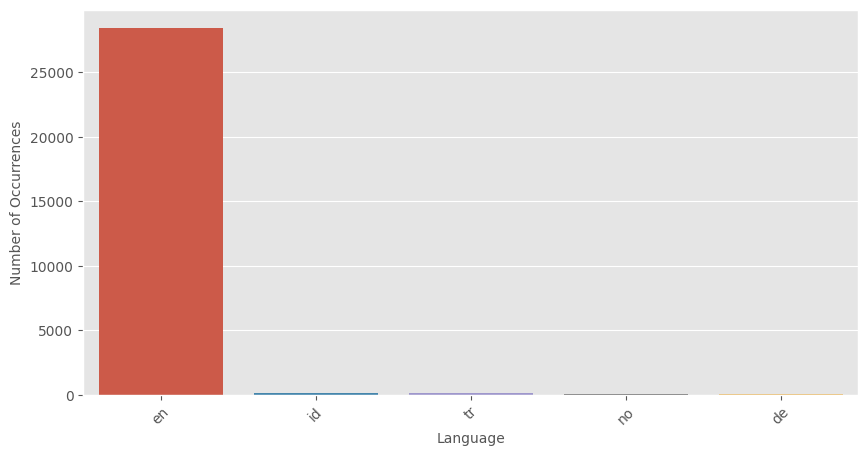

In [13]:
# language analysis
cnt_language = df_['lang'].value_counts()
top_5 = cnt_language.nlargest(5)
plt.figure(figsize=(10,5))
sns.barplot(x=top_5.index, y=top_5.values)
plt.ylabel('Number of Occurrences', fontsize=10)
plt.xlabel('Language', fontsize=10)
plt.xticks(rotation=45)
plt.show()

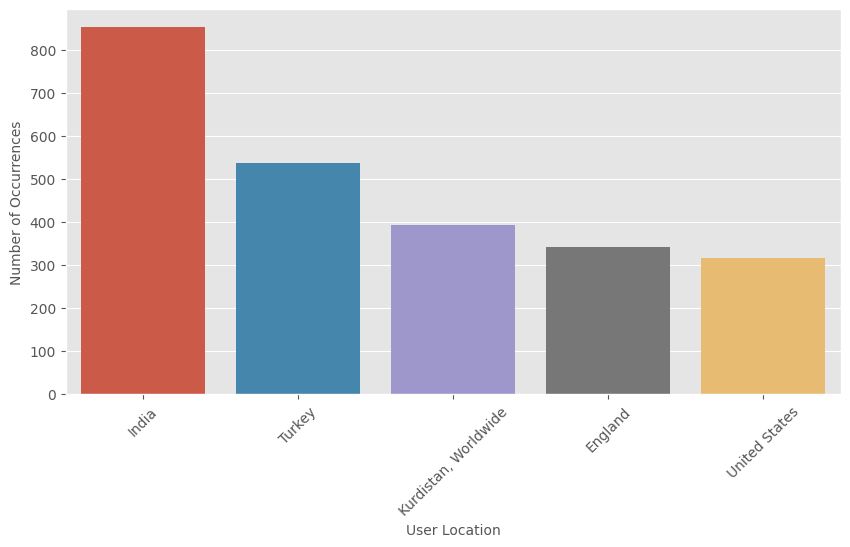

In [14]:
# user location analysis
cnt_location = df_['user_location'].value_counts()
top_5 = cnt_location.nlargest(5)
plt.figure(figsize=(10,5))
sns.barplot(x=top_5.index, y=top_5.values)
plt.ylabel('Number of Occurrences', fontsize=10)
plt.xlabel('User Location', fontsize=10)
plt.xticks(rotation=45)
plt.show()

### Data preparation

In [15]:
# filter only verified users
df_1=df_.query('user_location=="Turkey"')

In [16]:
df_1.shape

(538, 16)

In [17]:
# select interested columns
df_2=df_1[['date','text','user_location']]
df_3 = df_2.reset_index(drop=True).sort_values(by='date', ascending=True)

In [18]:
df_3

,date,text,user_location
46,2023-02-07 12:26:53+00:00,Rescue teams can't reach affected areas.People...,Turkey
45,2023-02-07 13:18:59+00:00,Collapsing building in the district of Diyarba...,Turkey
44,2023-02-07 13:21:09+00:00,Luckily the building had been evacuated.\n\n#P...,Turkey
43,2023-02-07 13:30:20+00:00,Second eartquake (7.6M)\n\n#PrayForTurkey #Tur...,Turkey
42,2023-02-07 13:32:41+00:00,Cat being rescued\n\n#PrayForTurkey #TurkeyEar...,Turkey
...,...,...,...
511,2023-02-24 21:41:37+00:00,The number of deaths from the #earthquakes in ...,Turkey
493,2023-02-25 17:51:52+00:00,"The child Sham, like Sham, is not well\n\n#ear...",Turkey
516,2023-02-25 17:51:52+00:00,"The child Sham, like Sham, is not well\n\n#ear...",Turkey
535,2023-02-26 10:41:04+00:00,Erdoğan government protested during first top-...,Turkey


In [19]:
# Check missing values
missing = df_3.isnull().sum()/df_3.shape[0]*100
missing


date             0.0
text             0.0
user_location    0.0
dtype: float64

In [20]:
# Min date
df_3.date.min()

'2023-02-07 12:26:53+00:00'

In [21]:
# Max date
df_3.date.max()

'2023-02-26 12:49:54+00:00'

### Sentiment with TextBlob

In [22]:
start= time.time()
sent_list_TB = []
for i in df_3["text"]:
    vs = TextBlob(i).sentiment[0]
    if (vs > 0):
        sent_list_TB.append('positive')
    elif (vs<0):
        sent_list_TB.append('negative')
    else:
        sent_list_TB.append('neutral')
end=time.time()
print ({end - start})

{0.18483352661132812}


In [23]:
df_3.loc[:, 'sentiment_TextBlob']=sent_list_TB

In [24]:
df_3['sentiment_TextBlob_num'] = df_3['sentiment_TextBlob'].map({'positive': 1, 'negative': -1, 'neutral':0})

### Sentiment with RoBERTa

In [25]:
# transformer pipeline
sentiment_pipeline_1 = pipeline("sentiment-analysis",model='cardiffnlp/twitter-roberta-base-sentiment-latest')

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [26]:
start= time.time()
sent_list_RB = []
for i in range(0,len(df_3)):
    label= sentiment_pipeline_1(df_3.iloc[i,1])[0]['label']
    sent_list_RB.append(label)
end=time.time()
print ({end - start})

{104.2202959060669}


In [27]:
df_3.loc[:, 'sentiment_RoBERTa']=sent_list_RB

In [28]:
df_3['sentiment_RoBERTa_num'] = df_3['sentiment_RoBERTa'].map({'positive': 1, 'negative': -1, 'neutral':0})

### Sentiment with BERT

In [29]:
# transformer pipeline
sentiment_pipeline_2 = pipeline("sentiment-analysis",model='cardiffnlp/bert-base-multilingual-cased-sentiment-multilingual',truncation=True)

In [30]:
start= time.time()
sent_list_BE = []
for i in range(0,len(df_3)):
    label= sentiment_pipeline_2(df_3.iloc[i,1])[0]['label']
    sent_list_BE.append(label)
end=time.time()
print ({end - start})

{104.01909446716309}


In [31]:
df_3.loc[:, 'sentiment_BERT']=sent_list_BE

In [32]:
df_3['sentiment_BERT_num'] = df_3['sentiment_BERT'].map({'positive': 1, 'negative': -1, 'neutral':0})

### Sentiment with DistillBERT

In [33]:
# transformer pipeline
sentiment_pipeline_3 = pipeline("sentiment-analysis",model='philschmid/distilbert-base-multilingual-cased-sentiment-2',truncation=True)

In [34]:
start= time.time()
sent_list_DBE = []
for i in range(0,len(df_3)):
    label= sentiment_pipeline_3(df_3.iloc[i,1])[0]['label']
    sent_list_DBE.append(label)
end=time.time()
print ({end - start})

{53.63577675819397}


In [35]:
df_3.loc[:, 'sentiment_DistillBERT']=sent_list_DBE

In [36]:
df_3['sentiment_DistillBERT_num'] = df_3['sentiment_DistillBERT'].map({'positive': 1, 'negative': -1, 'neutral':0})

### Sentiment Visualization

In [37]:
df_4 = pd.DataFrame(df_3.drop(['user_location'], axis=1))

In [38]:
df_4['date'] = pd.to_datetime(df_4.date)
df_4['time'] = df_4['date'].dt.date

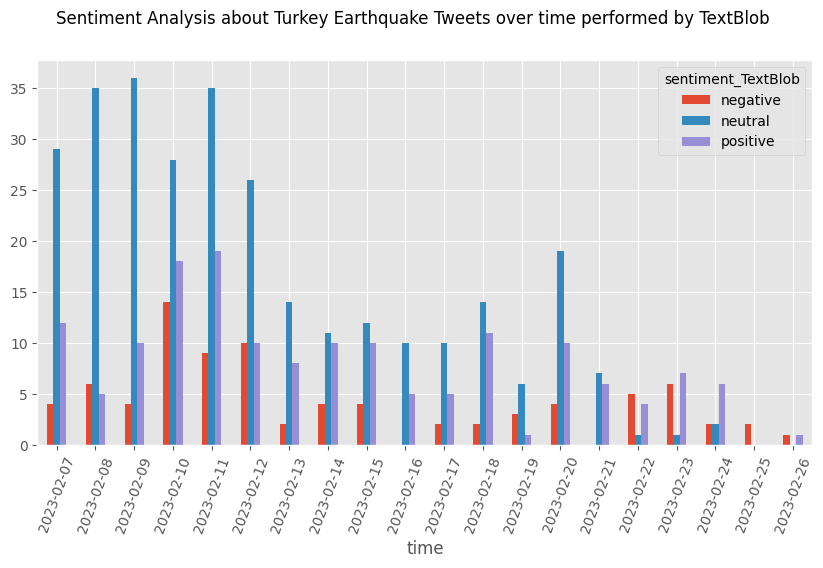

In [39]:
TextBlob_df = df_4.groupby(by='time')['sentiment_TextBlob'].value_counts()
TextBlob_unstacked = TextBlob_df.unstack(level=1)
plt.rcParams['figure.figsize']=(10,5)
TextBlob_unstacked.plot.bar()
plt.suptitle('Sentiment Analysis about Turkey Earthquake Tweets over time performed by TextBlob')
plt.xticks(rotation=70, fontsize=10)
plt.show()

In [40]:
sentiment_counts_TB = df_4.groupby(['sentiment_TextBlob']).size()
print(sentiment_counts_TB)

sentiment_TextBlob
negative     84
neutral     296
positive    158
dtype: int64


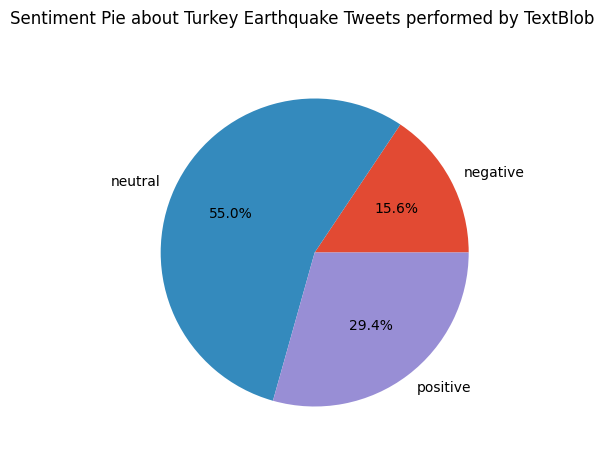

In [41]:
# pie sentiments
plt.rcParams['figure.figsize']=(10,5)
plt.suptitle('Sentiment Pie about Turkey Earthquake Tweets performed by TextBlob')
sentiment_counts_TB.plot.pie(autopct='%1.1f%%')
plt.show()

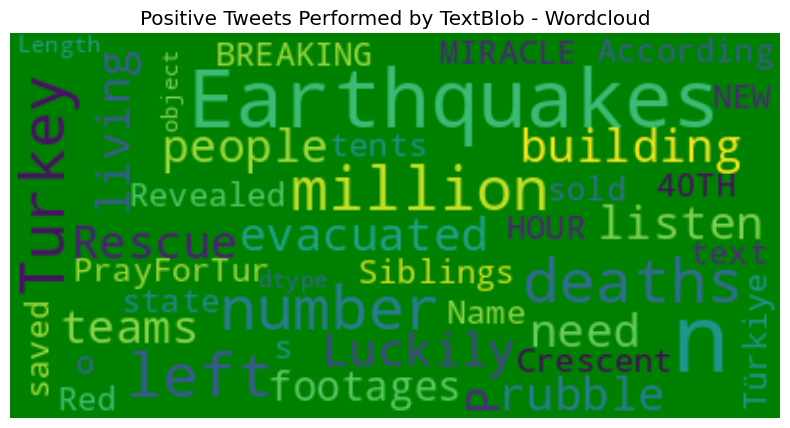

In [42]:
# Wordcloud with positive tweets
positive_tweets = df_3['text'][df_3["sentiment_TextBlob"] == 'positive']
stop_words = ["https", "www"] + list(STOPWORDS)
positive_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="green", stopwords = stop_words).generate(str(positive_tweets))
plt.rcParams['figure.figsize']=(10,5)
plt.title("Positive Tweets Performed by TextBlob - Wordcloud")
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

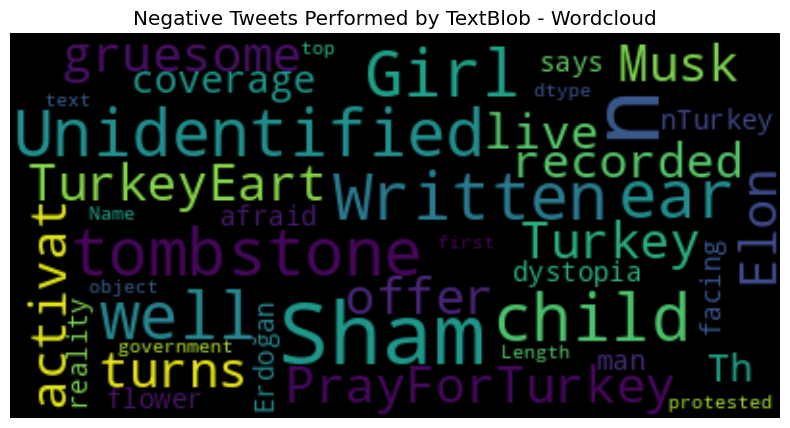

In [43]:
# Wordcloud with negative tweets
positive_tweets = df_3['text'][df_3["sentiment_TextBlob"] == 'negative']
stop_words = ["https", "www"] + list(STOPWORDS)
positive_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="black", stopwords = stop_words).generate(str(positive_tweets))
plt.rcParams['figure.figsize']=(10,5)
plt.title("Negative Tweets Performed by TextBlob - Wordcloud")
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

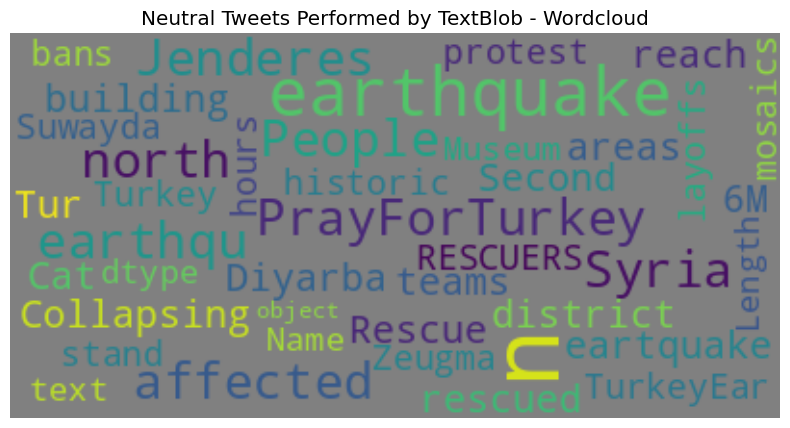

In [44]:
# Wordcloud with neutral tweets
positive_tweets = df_3['text'][df_3["sentiment_TextBlob"] == 'neutral']
stop_words = ["https", "www"] + list(STOPWORDS)
positive_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="grey", stopwords = stop_words).generate(str(positive_tweets))
plt.rcParams['figure.figsize']=(10,5)
plt.title("Neutral Tweets Performed by TextBlob - Wordcloud")
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

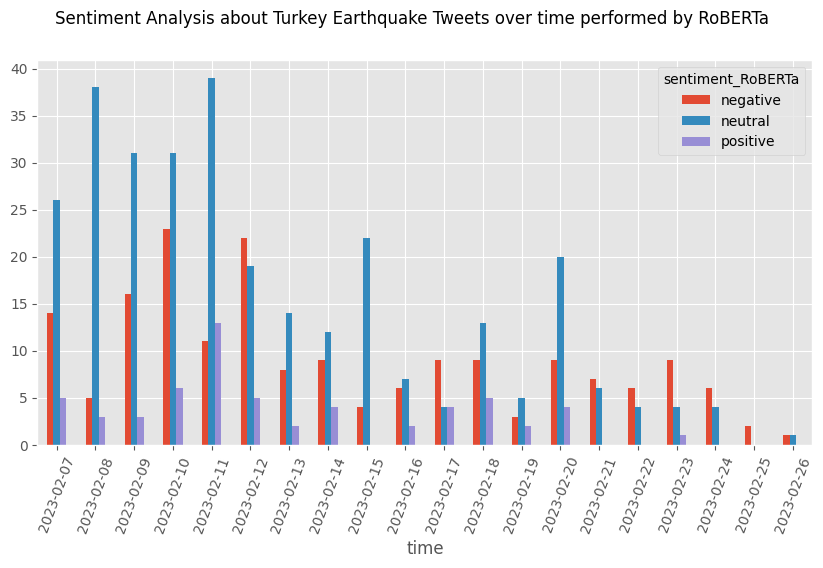

In [45]:
RoBERTa_df = df_4.groupby(by='time')['sentiment_RoBERTa'].value_counts()
RoBERTa_unstacked = RoBERTa_df.unstack(level=1)
plt.rcParams['figure.figsize']=(10,5)
RoBERTa_unstacked.plot.bar()
plt.suptitle('Sentiment Analysis about Turkey Earthquake Tweets over time performed by RoBERTa')
plt.xticks(rotation=70, fontsize=10)
plt.show()

In [46]:
sentiment_counts_RB = df_4.groupby(['sentiment_RoBERTa']).size()
print(sentiment_counts_RB)

sentiment_RoBERTa
negative    179
neutral     300
positive     59
dtype: int64


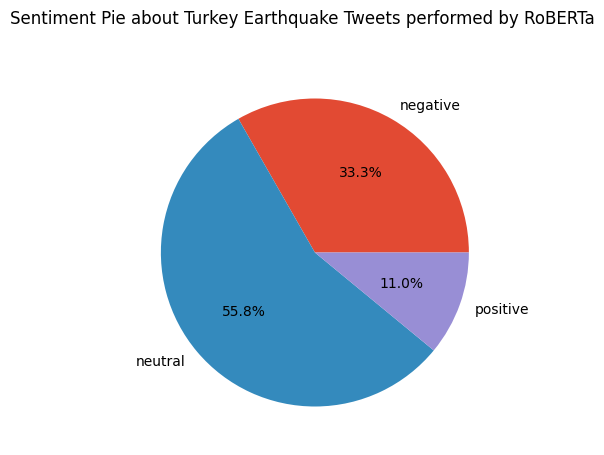

In [47]:
# pie sentiments
plt.rcParams['figure.figsize']=(10,5)
plt.suptitle('Sentiment Pie about Turkey Earthquake Tweets performed by RoBERTa')
sentiment_counts_RB.plot.pie(autopct='%1.1f%%')
plt.show()

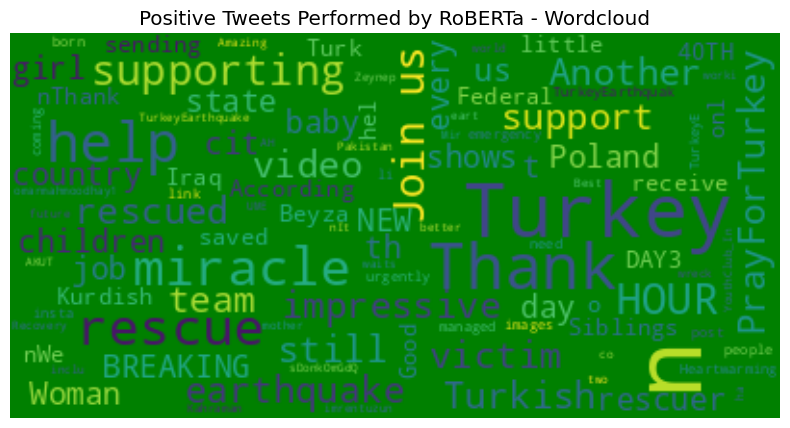

In [48]:
# Wordcloud with positive tweets
positive_tweets = df_3['text'][df_3["sentiment_RoBERTa"] == 'positive']
stop_words = ["https", "www"] + list(STOPWORDS)
positive_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="green", stopwords = stop_words).generate(str(positive_tweets))
plt.rcParams['figure.figsize']=(10,5)
plt.title("Positive Tweets Performed by RoBERTa - Wordcloud")
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

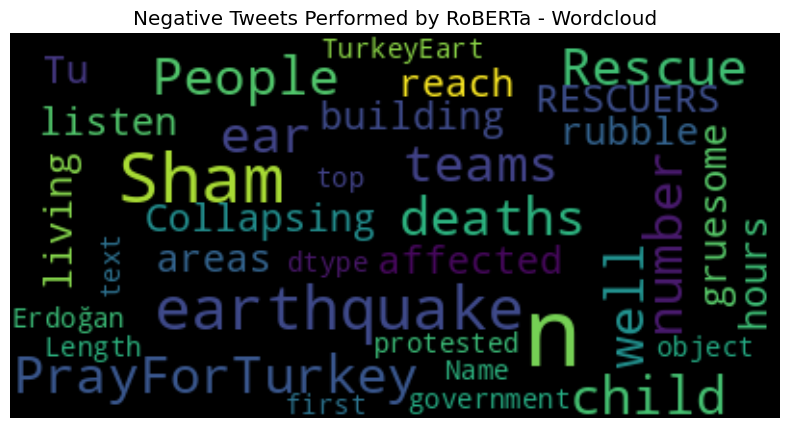

In [49]:
# Wordcloud with negative tweets
positive_tweets = df_3['text'][df_3["sentiment_RoBERTa"] == 'negative']
stop_words = ["https", "www"] + list(STOPWORDS)
positive_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="black", stopwords = stop_words).generate(str(positive_tweets))
plt.rcParams['figure.figsize']=(10,5)
plt.title("Negative Tweets Performed by RoBERTa - Wordcloud")
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

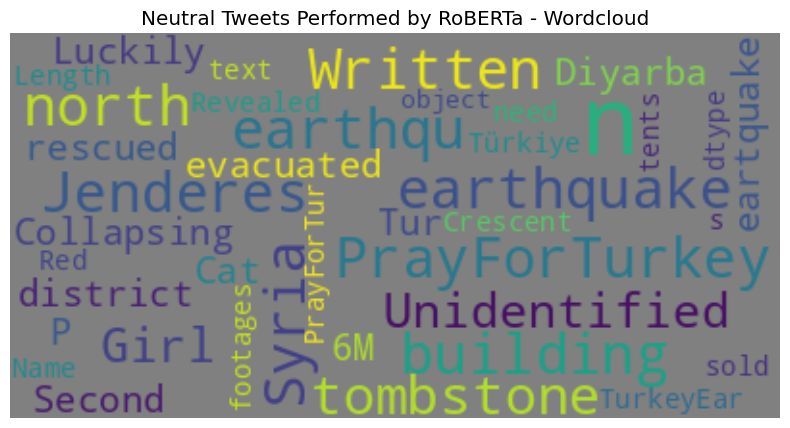

In [50]:
# Wordcloud with neutral tweets
positive_tweets = df_3['text'][df_3["sentiment_RoBERTa"] == 'neutral']
stop_words = ["https", "www"] + list(STOPWORDS)
positive_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="grey", stopwords = stop_words).generate(str(positive_tweets))
plt.rcParams['figure.figsize']=(10,5)
plt.title("Neutral Tweets Performed by RoBERTa - Wordcloud")
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

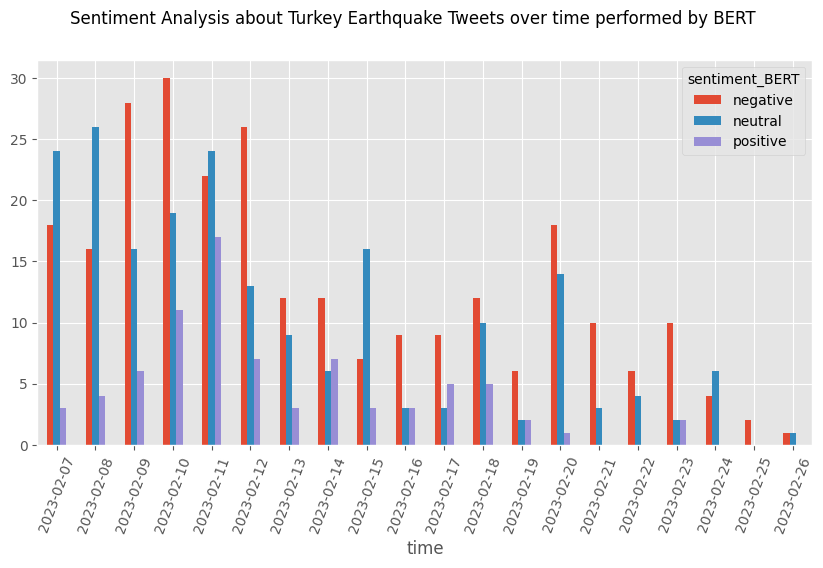

In [51]:
BERT_df = df_4.groupby(by='time')['sentiment_BERT'].value_counts()
BERT_unstacked = BERT_df.unstack(level=1)
plt.rcParams['figure.figsize']=(10,5)
BERT_unstacked.plot.bar()
plt.suptitle('Sentiment Analysis about Turkey Earthquake Tweets over time performed by BERT')
plt.xticks(rotation=70, fontsize=10)
plt.show()

In [52]:
sentiment_counts_BE = df_4.groupby(['sentiment_BERT']).size()
print(sentiment_counts_BE)

sentiment_BERT
negative    258
neutral     201
positive     79
dtype: int64


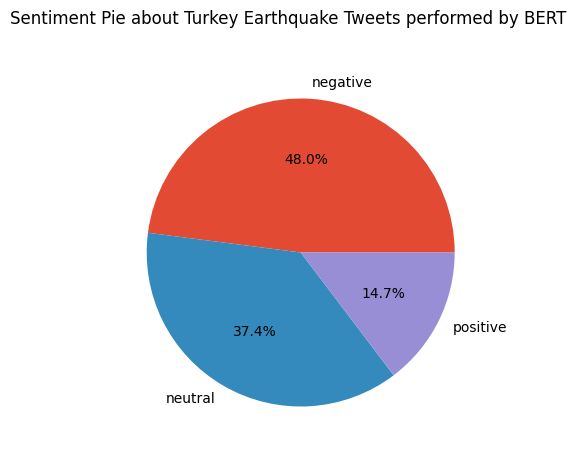

In [53]:
# pie sentiments
plt.rcParams['figure.figsize']=(10,5)
plt.suptitle('Sentiment Pie about Turkey Earthquake Tweets performed by BERT')
sentiment_counts_BE.plot.pie(autopct='%1.1f%%')
plt.show()

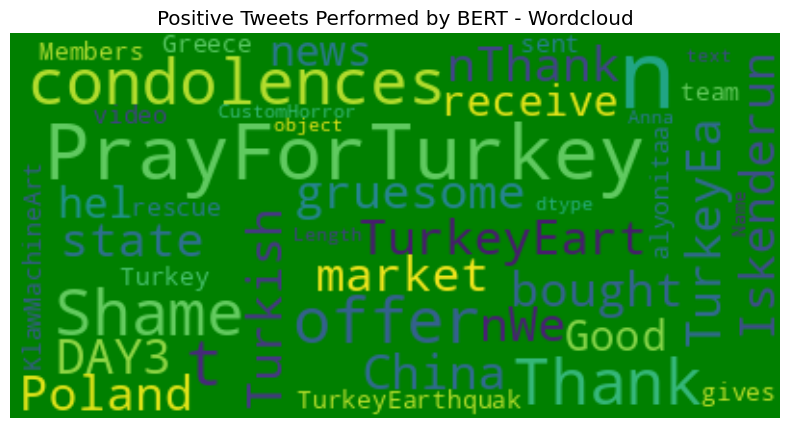

In [54]:
# Wordcloud with positive tweets
positive_tweets = df_3['text'][df_3["sentiment_BERT"] == 'positive']
stop_words = ["https", "www"] + list(STOPWORDS)
positive_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="green", stopwords = stop_words).generate(str(positive_tweets))
plt.rcParams['figure.figsize']=(10,5)
plt.title("Positive Tweets Performed by BERT - Wordcloud")
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

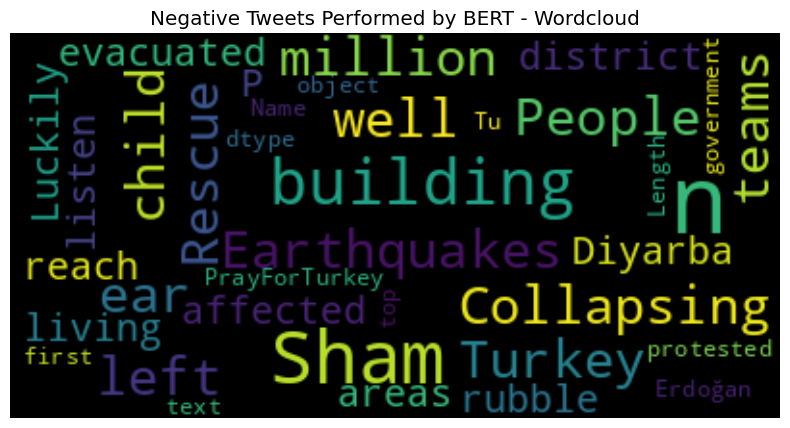

In [55]:
# Wordcloud with negative tweets
positive_tweets = df_3['text'][df_3["sentiment_BERT"] == 'negative']
stop_words = ["https", "www"] + list(STOPWORDS)
positive_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="black", stopwords = stop_words).generate(str(positive_tweets))
plt.rcParams['figure.figsize']=(10,5)
plt.title("Negative Tweets Performed by BERT - Wordcloud")
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

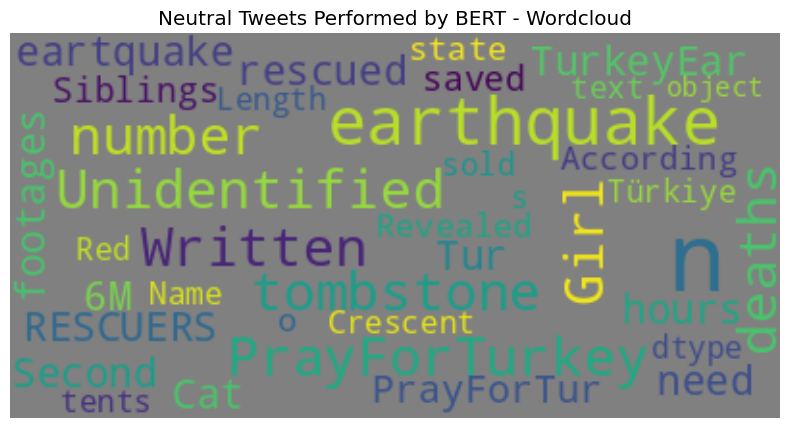

In [56]:
# Wordcloud with neutral tweets
positive_tweets = df_3['text'][df_3["sentiment_BERT"] == 'neutral']
stop_words = ["https", "www"] + list(STOPWORDS)
positive_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="grey", stopwords = stop_words).generate(str(positive_tweets))
plt.rcParams['figure.figsize']=(10,5)
plt.title("Neutral Tweets Performed by BERT - Wordcloud")
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

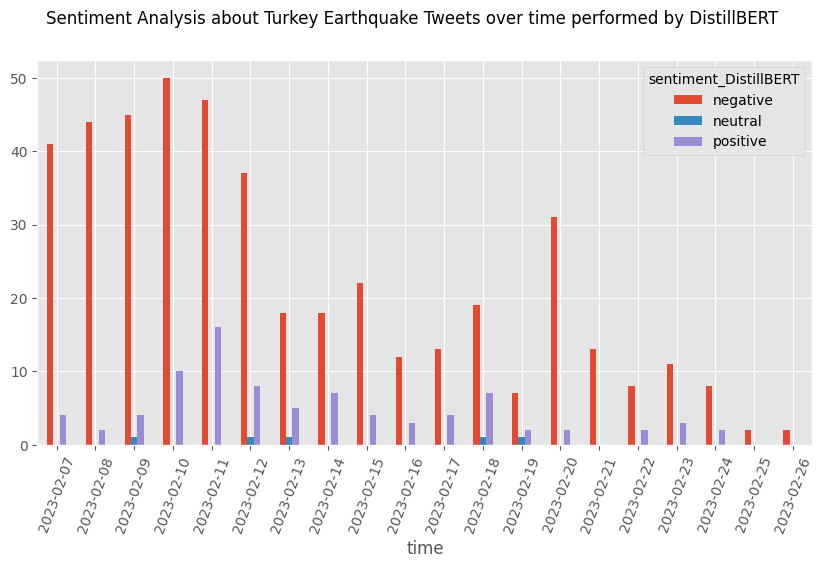

In [57]:
DistillBERT_df = df_4.groupby(by='time')['sentiment_DistillBERT'].value_counts()
DistillBERT_unstacked = DistillBERT_df.unstack(level=1)
plt.rcParams['figure.figsize']=(10,5)
DistillBERT_unstacked.plot.bar()
plt.suptitle('Sentiment Analysis about Turkey Earthquake Tweets over time performed by DistillBERT')
plt.xticks(rotation=70, fontsize=10)
plt.show()

In [58]:
sentiment_counts_DBE = df_4.groupby(['sentiment_DistillBERT']).size()
print(sentiment_counts_DBE)

sentiment_DistillBERT
negative    448
neutral       5
positive     85
dtype: int64


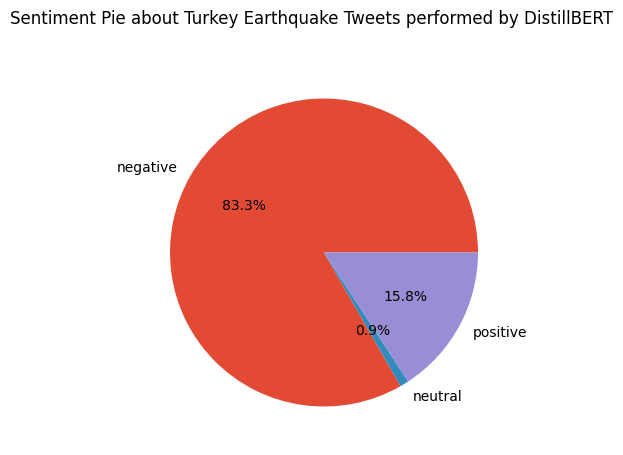

In [59]:
# pie sentiments
plt.rcParams['figure.figsize']=(10,5)
plt.suptitle('Sentiment Pie about Turkey Earthquake Tweets performed by DistillBERT')
sentiment_counts_DBE.plot.pie(autopct='%1.1f%%')
plt.show()

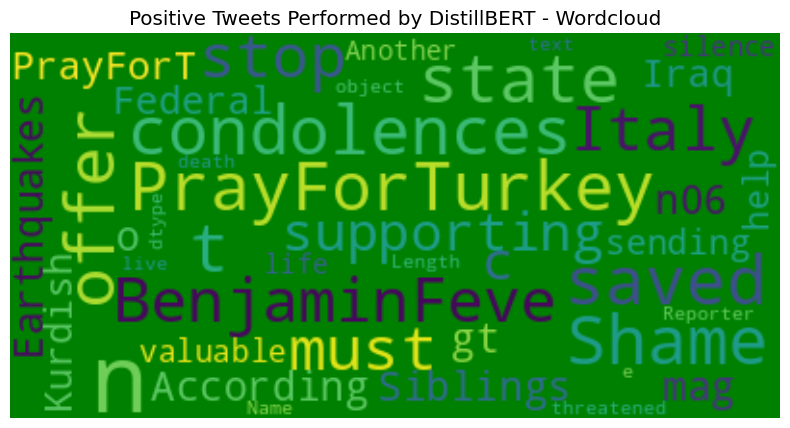

In [60]:
# Wordcloud with positive tweets
positive_tweets = df_3['text'][df_3["sentiment_DistillBERT"] == 'positive']
stop_words = ["https", "www"] + list(STOPWORDS)
positive_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="green", stopwords = stop_words).generate(str(positive_tweets))
plt.rcParams['figure.figsize']=(10,5)
plt.title("Positive Tweets Performed by DistillBERT - Wordcloud")
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

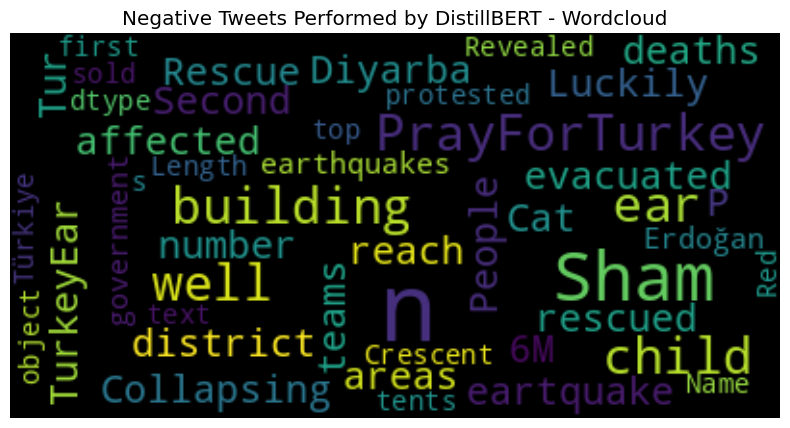

In [61]:
# Wordcloud with negative tweets
positive_tweets = df_3['text'][df_3["sentiment_DistillBERT"] == 'negative']
stop_words = ["https", "www"] + list(STOPWORDS)
positive_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="black", stopwords = stop_words).generate(str(positive_tweets))
plt.rcParams['figure.figsize']=(10,5)
plt.title("Negative Tweets Performed by DistillBERT - Wordcloud")
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

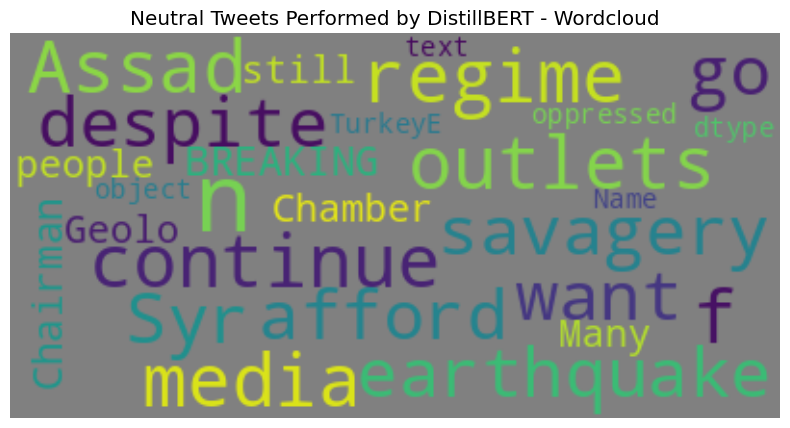

In [62]:
# Wordcloud with neutral tweets
positive_tweets = df_3['text'][df_3["sentiment_DistillBERT"] == 'neutral']
stop_words = ["https", "www"] + list(STOPWORDS)
positive_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="grey", stopwords = stop_words).generate(str(positive_tweets))
plt.rcParams['figure.figsize']=(10,5)
plt.title("Neutral Tweets Performed by DistillBERT - Wordcloud")
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()